# Grid Search

- Decision Tree 알고리즘 모델 튜닝하기

# 0. 라이브러리 불러오기 및 데이터 준비하기

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

In [2]:
# 데이터 읽어오기
path = '../data/mobile_data.csv'
data = pd.read_csv(path)

data.head()

,id,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,1,0,31953,0,6,313378,161,0,4,unsat,little,no,STAY
1,2,1,36147,0,13,800586,244,0,6,unsat,little,considering,STAY
2,3,1,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,STAY
3,4,0,120070,38,33,788235,780,3,2,unsat,very_high,considering,LEAVE
4,5,1,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,STAY


# 1. 데이터 파악하기

In [3]:
# 기술통계 확인
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,20000.0,10000.50000,5773.647028,1.0,5000.75,10000.5,15000.25,20000.0
COLLEGE,20000.0,0.50240,0.500007,0.0,0.00,1.0,1.00,1.0
INCOME,20000.0,80281.44775,41680.586319,20007.0,42217.00,75366.5,115881.75,159983.0
OVERAGE,20000.0,85.97955,85.992324,-2.0,0.00,59.0,179.00,335.0
LEFTOVER,20000.0,23.89865,26.816645,0.0,0.00,14.0,41.00,89.0
HOUSE,20000.0,493155.26425,252407.884692,150002.0,263714.25,452259.5,702378.00,999996.0
HANDSET_PRICE,20000.0,389.61510,213.820682,130.0,219.00,326.0,533.25,899.0
OVER_15MINS_CALLS_PER_MONTH,20000.0,8.00070,8.925418,0.0,1.00,4.0,15.00,29.0
AVERAGE_CALL_DURATION,20000.0,6.00225,4.402558,1.0,2.00,5.0,10.00,15.0


In [4]:
data.corr()

,id,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION
id,1.000000,-0.005557,0.003686,-0.006050,0.006069,0.011347,-0.007838,0.001254,-0.005830
COLLEGE,-0.005557,1.000000,0.011122,-0.003091,-0.003925,-0.000217,0.009950,-0.007205,-0.001490
INCOME,0.003686,0.011122,1.000000,0.000458,0.006515,-0.010964,0.727200,0.002136,-0.007219
OVERAGE,-0.006050,-0.003091,0.000458,1.000000,-0.003123,0.002412,0.000324,0.770557,0.000653
LEFTOVER,0.006069,-0.003925,0.006515,-0.003123,1.000000,0.006530,0.004004,-0.010411,-0.660285
HOUSE,0.011347,-0.000217,-0.010964,0.002412,0.006530,1.000000,-0.007756,0.007410,-0.009359
HANDSET_PRICE,-0.007838,0.009950,0.727200,0.000324,0.004004,-0.007756,1.000000,0.002680,-0.005190
OVER_15MINS_CALLS_PER_MONTH,0.001254,-0.007205,0.002136,0.770557,-0.010411,0.007410,0.002680,1.000000,0.007769
AVERAGE_CALL_DURATION,-0.005830,-0.001490,-0.007219,0.000653,-0.660285,-0.009359,-0.005190,0.007769,1.000000


# 2. 데이터 전처리

**1) 변수 제거**

In [5]:
# 제거 대상: id
del_cols = ['id']

# 변수 제거
data.drop(del_cols, axis=1, inplace=True)

# 확인
data.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,0,31953,0,6,313378,161,0,4,unsat,little,no,STAY
1,1,36147,0,13,800586,244,0,6,unsat,little,considering,STAY
2,1,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,STAY
3,0,120070,38,33,788235,780,3,2,unsat,very_high,considering,LEAVE
4,1,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,STAY


**2) x, y 분리**

In [6]:
# Target 설정
target = "CHURN"

# 데이터 분리
x = data.drop(target, axis=1)
y = data.loc[:,target]

**3) 가변수화**

In [7]:
# 가변수화 대상: REPORTED_SATISFACTION, REPORTED_USAGE_LEVEL, CONSIDERING_CHANGE_OF_PLAN
dumm_cols = ['REPORTED_SATISFACTION', 'REPORTED_USAGE_LEVEL', 'CONSIDERING_CHANGE_OF_PLAN']

# 가변수화
x = pd.get_dummies(x, columns=dumm_cols, drop_first=True)

# 확인
x.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION_sat,REPORTED_SATISFACTION_unsat,REPORTED_SATISFACTION_very_sat,REPORTED_SATISFACTION_very_unsat,REPORTED_USAGE_LEVEL_high,REPORTED_USAGE_LEVEL_little,REPORTED_USAGE_LEVEL_very_high,REPORTED_USAGE_LEVEL_very_little,CONSIDERING_CHANGE_OF_PLAN_considering,CONSIDERING_CHANGE_OF_PLAN_never_thought,CONSIDERING_CHANGE_OF_PLAN_no,CONSIDERING_CHANGE_OF_PLAN_perhaps
0,0,31953,0,6,313378,161,0,4,0,1,0,0,0,1,0,0,0,0,1,0
1,1,36147,0,13,800586,244,0,6,0,1,0,0,0,1,0,0,1,0,0,0
2,1,27273,230,0,305049,201,16,15,0,1,0,0,0,0,0,1,0,0,0,1
3,0,120070,38,33,788235,780,3,2,0,1,0,0,0,0,1,0,1,0,0,0
4,1,29215,208,85,224784,241,21,1,0,0,0,1,0,1,0,0,0,1,0,0


**4) 학습용, 평가용 데이터 분리**

In [8]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

# 3. 성능 예측
- K-Fold Cross Validation 사용해 모델의 성능 예측

In [20]:
# 불러오기
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [21]:
# 모델 선언하기
tree_model = DecisionTreeClassifier(random_state=1)

In [22]:
# 성능 예측
cv_score = cross_val_score(tree_model, x_train, y_train, cv=10)

In [23]:
# 확인
print(cv_score[:5])
print(cv_score.mean())

[0.60785714 0.61357143 0.63571429 0.61785714 0.61571429]
0.6188571428571429


# 4. 모델 튜닝하기
- Grid Search로 튜닝

**1) 모델 튜닝**

- 성능을 확인할 파라미터를 딕셔너리 형태로 선언
- 기존 모델을 기본으로 GridSearchCV 알고리즘을 사용하는 모델을 선언
- 다음 정보를 최종 모델에 파라미터로 전달
- n_iter 옵션을 지정하지 않음
    - 기본 모델 이름
    - 파라미터 변수
    - cv: K-Fold 분할 개수(기본값=5)
    - scoring: 평가 방법

In [24]:
# 함수 불러오기
from sklearn.model_selection import GridSearchCV

# 파라미터 선언
  # max_depth: 1~50
param = {'max_depth': range(1,51)}

# Grid Search 선언
  # cv=5
  # n_iter=20
  # scoring='r2'
model = GridSearchCV(tree_model, # 기본 모델
                      param,       # 파라미터 범위
                      cv=5,        # K-Folde 개수
                      )

In [25]:
# 학습하기
model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'max_depth': range(1, 51)})

**2) 결과 확인**

- model.cv_results_ 속성에 성능 테스트와 관련된 많은 정보가 포함되어 있다.
- 이 중 중요한 정보를만 추출해서 확인한다.
- 다음 3가지는 꼭 기억해야 합니다.
    - model.cv_results_['mean_test_score']: 테스트로 얻은 성능
    - model.best_params_: 최적의 파라미터
    - model.best_score_: 최고의 성능

In [26]:
# 중요 정보 확인
print('=' * 80)
print(model.cv_results_['mean_test_score'])
print('-' * 80)
print('최적파라미터:', model.best_params_)
print('-' * 80)
print('최고성능:', model.best_score_)
print('=' * 80)

[0.61735714 0.656      0.68907143 0.69964286 0.69621429 0.69607143
 0.69871429 0.69435714 0.68628571 0.67707143 0.67328571 0.6675
 0.65957143 0.65514286 0.65085714 0.64478571 0.63928571 0.63442857
 0.63321429 0.62492857 0.62321429 0.62478571 0.61685714 0.61928571
 0.62078571 0.62071429 0.6165     0.61692857 0.61792857 0.61828571
 0.61457143 0.61571429 0.61642857 0.61621429 0.6155     0.61521429
 0.61521429 0.61521429 0.61521429 0.61521429 0.61521429 0.61521429
 0.61521429 0.61521429 0.61521429 0.61521429 0.61521429 0.61521429
 0.61521429 0.61521429]
--------------------------------------------------------------------------------
최적파라미터: {'max_depth': 4}
--------------------------------------------------------------------------------
최고성능: 0.6996428571428571


**3) 변수 중요도**

- model.best_estimator_ 모델의 변수 중요도를 확인하자.

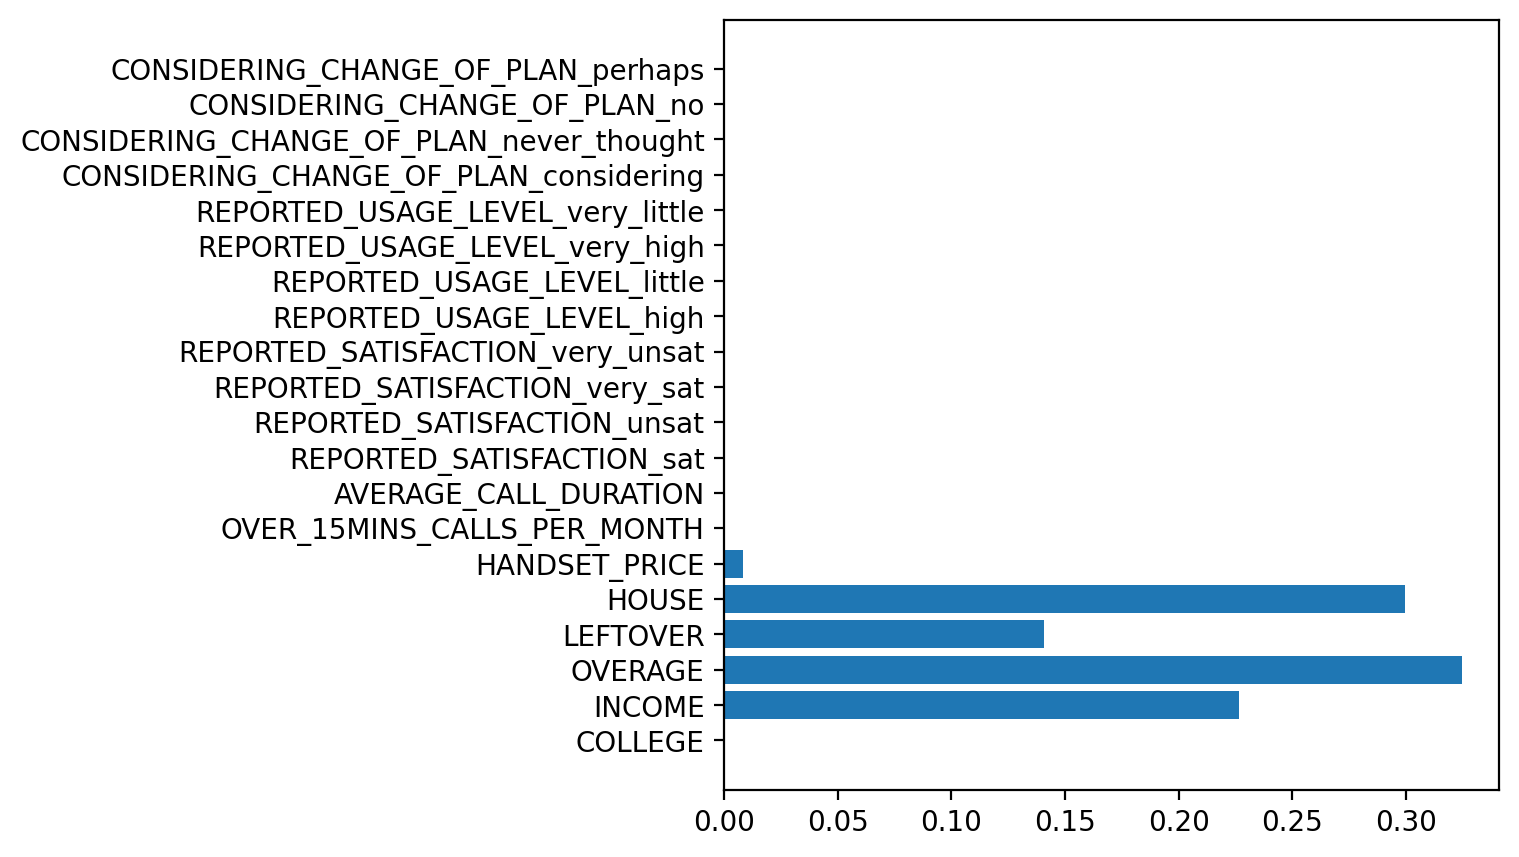

In [27]:
# 변수 중요도
plt.figure(figsize=(5, 5))
plt.barh(y=list(x), width=model.best_estimator_.feature_importances_)
plt.show()

# 5. 성능 평가

In [28]:
# 예측하기
y_pred = model.predict(x_test)

In [29]:
from sklearn.metrics import confusion_matrix, classification_report

# 평가하기
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))

Confusion Matrix: [[2289  646]
 [1135 1930]]
Classification Report:               precision    recall  f1-score   support

       LEAVE       0.67      0.78      0.72      2935
        STAY       0.75      0.63      0.68      3065

    accuracy                           0.70      6000
   macro avg       0.71      0.70      0.70      6000
weighted avg       0.71      0.70      0.70      6000

